# Kaggle Project: Titanic - Machine Learning from Disater

# Table of Contents
* [1.Introduction](#introduction)
* [2.Loading the Data](#loading-data)
* [3.Exploratory Data Analysis (EDA)](#data)
* [4.Feature Engineering & Data Wrangling](#feature)
* [5.Mode Training](#model-traning)

# 1. Introduction <a class="anchor" id="introduction"></a>
The sinking of the RMS Titanic is one of the most inframe shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss was that were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
# 2. Loading the Data<a class="anchor" id="loading-data"></a>

In [17]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train_df = pd.read_csv("./titanic_data/train.csv")
test_df = pd.read_csv("./titanic_data/test.csv")

In [19]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Notes**:

* `SibSp`: # of siblings aboard the Titanic
* `Parch`: # of parents/children aboard of Titanic

In [22]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### PassengerId

The frist column is the passenger ID, so its not really a part of the information we should care about. Let's use df.set_index method to make it the index for the dataset and drop this column.

In [25]:
# set_index cột passengerId vào cột ID xong mới xóa cột passengerId
train_df.set_index(train_df.PassengerId, inplace = True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train_df.drop("PassengerId", axis =1, inplace = True) 
# axis=1 là chọn cả cột , inplace =True là sửa ngay trên dataset 
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [27]:
#Tương tự làm với file test, cách khác
test_df = pd.read_csv("./titanic_data/test.csv", index_col="PassengerId")
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Features Classification: Categorical vs Numerical

In [29]:
# to spetify categorical and Numerical, check it
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Based on inform above we have:

* Categorical : `Survived`, `Sex`,`Embarked`, `Pclass`,`SibSp`,`Parch`
* Numerical: (continuous) `Age`, `Fare`(discrete)
* Mix types of data: `Name`
* Blank or Null: `Cabin`>`Age`>`Embarked`

In [32]:
#  Survived columns has dtype int64- which is a numerrical type
# but it passenger is marked as 1 means he/she survived means categorical 
# So we change that
train_df["Survived"] = train_df["Survived"].astype("category")

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [34]:
# But there are has many so use for-loop funtion
features = ["Sex","Pclass","Embarked","SibSp","Parch"]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")
# vd df.Pclass or df["Pclass"] thì ok vì feature là cả cụm "Pclass" nên df.feature ko dc vì df."Pclass" ko dc
convert_cat(train_df,features)
convert_cat(test_df,features)

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


### 2.1 Distribution of Numerical features

In [37]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [38]:
# Fare dc gọi là rời rạc(discrete) vì giá vé chênh từ 0-500
# lý do fai convert category vì nếu ko khi use describe nó sẽ tính hết dtype int64 vào

### 2.2 Distribution of Categorical features

In [40]:
train_df.describe(include = ["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [41]:
# ta thấy, trong survived 0-died đứng top, freq 549/891 died
# Pclass có hạng thấp nhất 3 đứng top, 491/891 hạng 3

## 3. Exploratory Data Analysis (EDA)<a class="anchor" id="data"></a>
### 3.1 Correlating categorical features
* Categorical : `Survived`, `Sex`,`Embarked`, `Pclass`,`SibSp`,`Parch`

#### Target Variable : `Survived`

In [44]:
# Count survied people
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [45]:
#Present by %
train_df["Survived"].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


Only 38% survived the disaster. So the traning data suffers from data imbalance but it is not servere which is not need to use techniques like sampling to tackle the imbalance.
#### `Sex`

In [47]:
train_df["Sex"].value_counts().to_frame()

,count
Sex,
male,577
female,314


Hypothesis: We know about "Lady Frist". So mind see if its true on that situations?Will "Survived" was be affected by "Sex"?

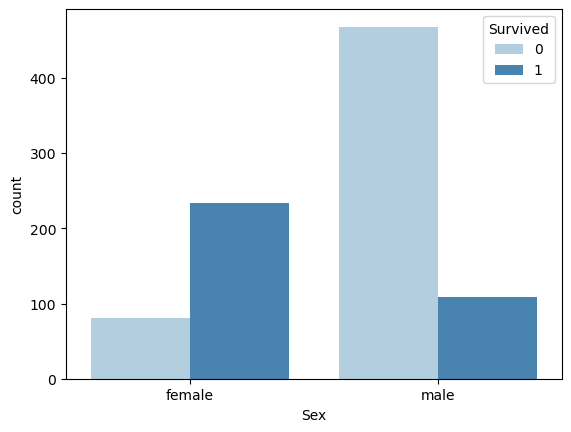

In [49]:
# connect inform sex and survived by seaborn
sns.countplot(data=train_df, x="Sex", hue="Survived", palette="Blues");

We can see that percentist of survived was almost be affected by sex. So we will remaining all categorical features columns to see how "Survived" was be affected by using for-loop matrix

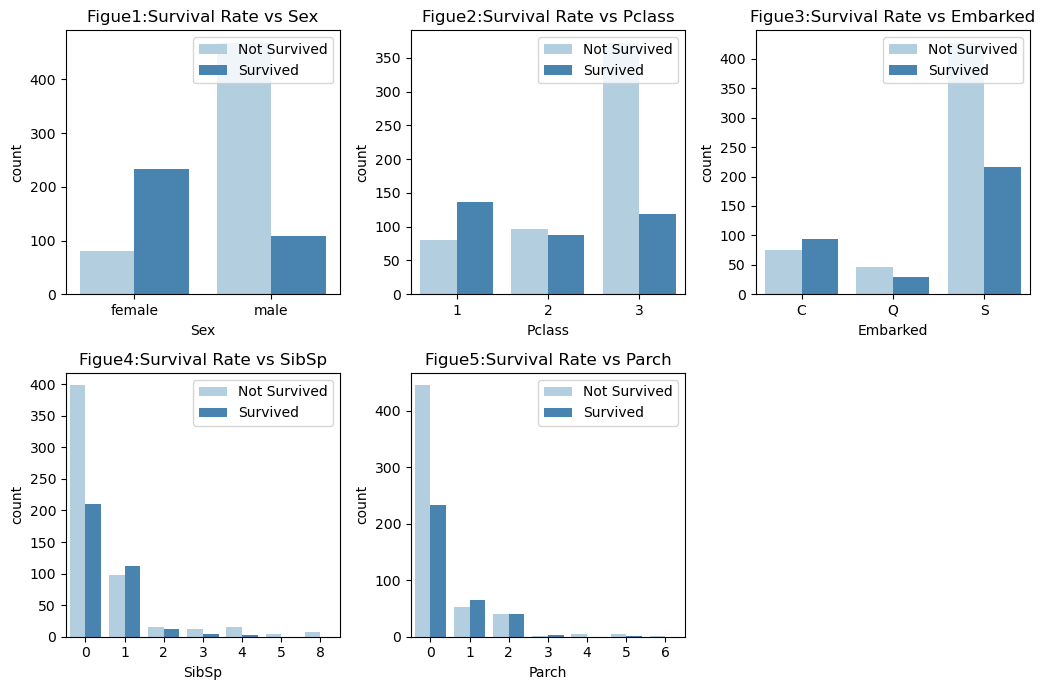

In [51]:
cols = ["Sex","Pclass","Embarked","SibSp","Parch"]
# giả định có 5 biểu đồ thì tạo matrix (row 2, col 3)
n_rows =2
n_cols=3
fig,ax=plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5,n_rows*3.5))

for r in range (0,n_rows):  # r trc vì sẽ dc kq từ trái sang phải , từ trên xg dưới
    for c in range (0,n_cols): # nếu để c trc thì ax_i bị lộn xộn
        i = r*n_cols + c #index to loop through list "cols"
        if i<len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue ="Survived",palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figue{i+1}:Survival Rate vs {cols[i]}")
            ax_i.legend(title='', loc="upper right", labels=["Not Survived","Survived"])
ax.flat[-1].set_visible(False) # Remove the last subplot
plt.tight_layout() # Unoverlap subplot
plt.show() # not need but should

### Observation:
*  **Survival Rate**:
    - Fig 1: Female survival rate>male
    - Fig 2: Most People embarked on Southampton, and also had the highest people not survived
    - Fig 3: 1st class higher survival rate. Were they got priority?
    - Fig 4: People going with 0`SibSp` are mostly not survived. The number of passenger with 1-2 family members has a chance of survival
    - Fig 5: People going with 0`Parch` are mostly not survival. Means: "Should travel with family or friends, so when you are in being lost or smt family will find you. 
   

### EDA for Numerical Features
* Numerical Features:(continous)`Age`, `Fare`

**Age**

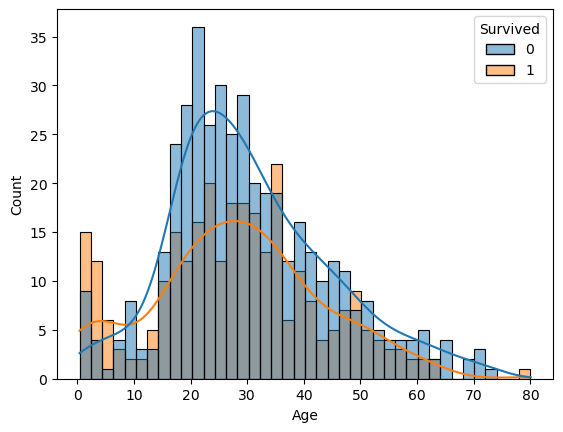

In [54]:
sns.histplot(data=train_df, x="Age", hue="Survived", bins=40, kde=True); #bins số cols

* Majority passengers were from 18-40 ages
* Children and elders had more chance to survive than other ages
* Around 35ages or under 50 ages had survived because they had experience on survival traning?

**Fare**

In [57]:
# Describe to have whole look
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

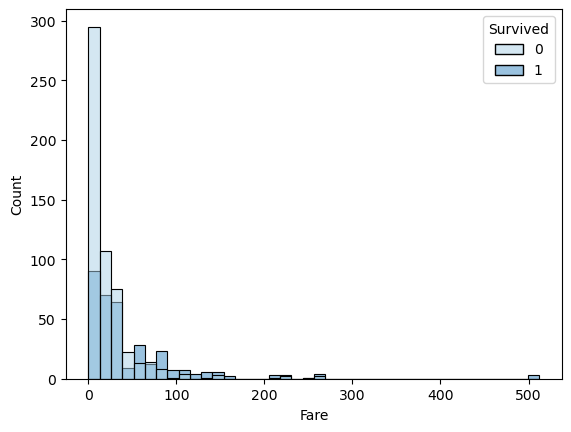

In [58]:
sns.histplot(data=train_df, x="Fare", hue="Survived", bins =40, palette="Blues");

In [59]:
# Plot overly complicate so split to quartile 0-25%, 25-50, 50-75, 75-100
pd.qcut(train_df["Fare"],4)

PassengerId
1       (-0.001, 7.91]
2      (31.0, 512.329]
3       (7.91, 14.454]
4      (31.0, 512.329]
5       (7.91, 14.454]
            ...       
887     (7.91, 14.454]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (14.454, 31.0]
891     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

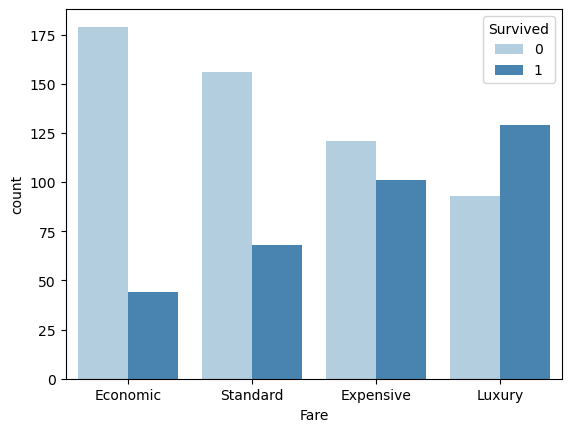

In [60]:
# Name for quartile and plot a count
fare_categories = ["Economic", "Standard", "Expensive", "Luxury"]
quartile_data = pd.qcut(train_df["Fare"],4, labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df["Survived"], palette="Blues");

#### Observation og distribution Fare:
* Fare dose not follow a normal distribution and has a huge spike at the price range `[0-100]`
* The distribution is skewed to the left with `75%`of the fare paid under`$31` and a max paid fare of `$512`
* Passenger with Luxury & Expensice Fare will have more chance to survive

## 4. Feature Engineering & Data Wrangling<a class="anchor" id="feature"></a>
### 4.1 Feature Enginerring
### Name
* Regular Expression

In [63]:
train_df["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [83]:
import re
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip() # re took space
# Apply on train dataframe
train_df["Name"].apply(lambda name: extract_title(name))

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Name, Length: 891, dtype: object

In [75]:
#Make new column Title
train_df["Title"]=train_df["Name"].apply(lambda name: extract_title(name))

In [77]:
# Check count title
train_df["Title"].value_counts()

Title
Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: count, dtype: int64

In [85]:
test_df["Title"] = test_df["Name"].apply(lambda name: extract_title(name))

In [89]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [93]:
# EDA Name and Survived
#Because there are title has a passenger so group all it in others
def group_title(title):
    if title in ["Mr", "Mrs", "Miss", "Master"]:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Other"
train_df ["Title"]=train_df ["Title"].apply(lambda title: group_title(title))
train_df["Title"].value_counts()

Title
Mr        517
Miss      183
Mrs       124
Master     40
Other      27
Name: count, dtype: int64

In [95]:
test_df ["Title"]=test_df ["Title"].apply(lambda title: group_title(title))

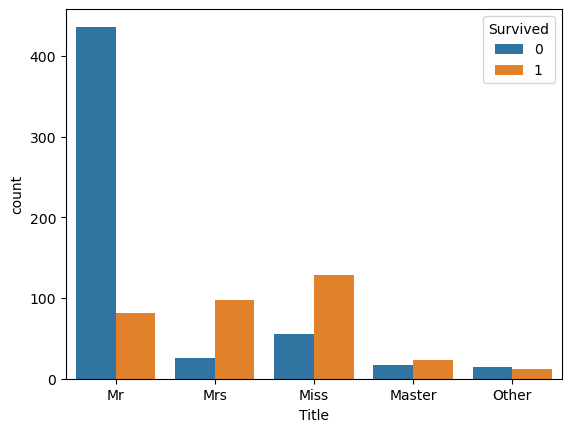

In [97]:
sns.countplot(data=train_df, x="Title", hue="Survived");

### Family
* `SibSp`,`Parch`

In [172]:
#cause SibSp and Parch are same so group them in one
train_df["Family_Size"] = train_df["SibSp"].astype("int")+train_df["Parch"].astype("int")+ 1

In [184]:
test_df["Family_Size"] = test_df["SibSp"].astype("int")+test_df["Parch"].astype("int")+ 1

In [162]:
train_df["Family_Cat"]=pd.cut(train_df["Family_Size"], bins=[0,1,4,6,20], labels=["Solo","Small", "Medium", "Large"]) #(0,1] (1,4]

In [190]:
test_df["Family_Cat"]=pd.cut(test_df["Family_Size"], bins=[0,1,4,6,20], labels=["Solo","Small", "Medium", "Large"])

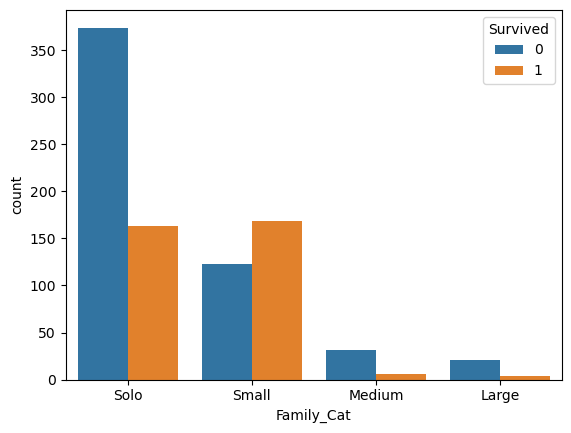

In [141]:
sns.countplot(data=train_df, x="Family_Cat", hue="Survived");

### 4.2 Data Wrangling

In [143]:
num_features = ["Age", "Fare"]
cat_features = ["Sex", "Pclass", "Embarked", "Title", "Family_Cat"]
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [192]:
# Check missing value
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count>0:
            print (f"{col} has {missing_count*100/n_rows:.2f}% missing values")
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Age has 19.87% missing values
Embarked has 0.22% missing values
Age has 20.57% missing values
Fare has 0.24% missing values


### Filling missing values
#### Age
- Filling missing values with `median` of whole dataset

In [200]:
# But age has lots of missing value so can not use median whole dataset. 
# We take median age by group of sex and pclass
# because the category dtype in pandas does not support aggregation functions like median
# So Convert 'Sex' and 'Pclass' to compatible dtypes for aggregation
train_df['Sex'] = train_df['Sex'].astype('object')
train_df['Pclass'] = train_df['Pclass'].astype('int')

# Group by 'Sex' and 'Pclass' and calculate the median of 'Age'
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'])['Age'].median()
print(age_by_sex_pclass)

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [210]:
# Fill missing Age values with the median age for each group
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [410]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'],observed=False)['Age'].transform(lambda x: x.fillna(x.median()))

In [212]:
display_missing(train_df,feature_cols)
display_missing(test_df,feature_cols)

Embarked has 0.22% missing values
Fare has 0.24% missing values


##### Filling missing in Embarked and Fare

In [222]:
X = train_df[feature_cols]
y=train_df["Survived"]

In [224]:
X_test = test_df[feature_cols]

In [242]:
# Preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_transfomer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # cat do not has median so instead it
    ("enconder", OneHotEncoder(handle_unknown = "ignore"))
])

In [246]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transfomer, cat_features)
])

In [248]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('enconder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [250]:
X = preprocessor.transform(X) # X->X_train, X_val

In [252]:
X_test = preprocessor.transform(X_test)

## 5.Mode Training<a class="anchor" id="model-traning"></a>

In [254]:
from sklearn.model_selection import train_test_split

In [256]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [279]:
# This is binary classfication 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [265]:
log_reg = LogisticRegression(solver="liblinear", max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [318]:
log_reg.score(X_val, y_val)

0.8379888268156425

In [273]:
y_pred =log_reg.predict(X_val)

In [277]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7808219178082192, 0.8142857142857143)

In [281]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       109
           1       0.78      0.81      0.80        70

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [283]:
# precission 88% trong đó recall 85% ý là 85% true trong 88%
# f1-Score trung bình cộng precision và recall

* y= ax1 + bx2+bias -> y = ax1^2 + bx2^2 +cx1*x2 +bias nâng bậc use PolynomialFeature dùng cho model liblinear-tuyen tinh
##### Thử nâng bậc X train lên để xem accuracy có tốt hơn không?
accuracy ko nâng = log_reg.score(X_val, y_val) 0.8379888268156425

In [286]:
from sklearn.preprocessing import PolynomialFeatures

In [326]:
poly=PolynomialFeatures(degree=5)
poly_feature_X_train = poly.fit_transform(X_train)
poly_feature_X_val =poly.transform(X_val) # no fit bz not accuracy

In [328]:
poly_log_reg = LogisticRegression(solver="liblinear", max_iter=1000) 
# vì log_reg trên fit vào hàm ko năng bậc mất rồi
poly_log_reg.fit(poly_feature_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [330]:
poly_log_reg.score(poly_feature_X_val, y_val) 
# nếu X_val thì error vì chưa nâng bậc cols sẽ ít 

0.8100558659217877

In [304]:
# log_reg.score(X_val, y_val) 0.8379888268156425
# degree =2 thi 0.8379888268156425

##### Try other model

In [311]:
# Decision Tree bài toán phân loại nên dùng Classifier
from sklearn.tree import DecisionTreeClassifier

In [314]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [316]:
decision_tree.score(X_val, y_val)

0.7653631284916201

In [332]:
# Decision Tree not good enough? May be X_val fit with LogisticRegression than DecissionClassifier
# So to not bias model we should use Cross-Validation (means that X will be split in to 5:5)
# to evaluate in same model by 5 fold( K-fold-Cross-Validation) and then calculate mean&Standard deviation


### 5.1 Cross-validation

In [335]:
from sklearn.model_selection import cross_val_score

In [337]:
log_reg_cv = LogisticRegression(solver="liblinear", max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion="entropy", max_depth =8 , random_state =1)
lr_scores = cross_val_score(log_reg_cv, X,y, scoring="accuracy",cv=5) # hàm cross_val_score auto split 5 fold

In [341]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [343]:
dt_scores = cross_val_score(dt_cv, X,y, scoring="accuracy",cv=5) # hàm cross_val_score auto split 5 fold

In [345]:
dt_scores.mean(), dt_scores.std() # độ sai lệch

(0.8036281463812692, 0.02061014881717163)

In [ ]:
#Overall logistic is better but the result of decissionTree above is 76%

### 5.2 Baseline Model Comparison

In [348]:
# Choosing the right estimator https://scikit-learn.org/stable/machine_learning_map.html

In [388]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier
seed =2024
models = [
    LinearSVC(dual='auto',max_iter=10000,random_state= seed),
    SVC(random_state =seed),
    KNeighborsClassifier(metric="minkowski",p=2),
    LogisticRegression(solver="liblinear", max_iter=1000),
    DecisionTreeClassifier(random_state = seed),
    RandomForestClassifier(random_state = seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(algorithm='SAMME'),
    XGBClassifier( eval_metric= "logloss", random_state = seed)
]

In [408]:
# call all model tạo hàm để run X qua các model
from sklearn.model_selection import StratifiedKFold
%matplotlib inline
def generate_baseline_results(models, X,y,metrics, cv=5, plot_results=False,random_state= seed):
    # define k-fold:
    kfold= StratifiedKFold(n_splits=cv, shuffle=True, random_state =seed)
    entries =[]
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X,y,scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx,score))
    cv_df = pd.DataFrame(entries, columns =["model_name", "fold_id", "accuracy_score"])
    #can not catch overall so plot is needed:
    if plot_results:
        sns.boxplot(x="model_name", y="accuracy_score", data=cv_df, color="lightblue",showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
    # Summary result
    mean = cv_df.groupby("model_name")["accuracy_score"].mean()
    std = cv_df.groupby("model_name")["accuracy_score"].std()

    baseline_results = pd.concat([mean,std], axis=1, ignore_index =True)
    baseline_results.columns=["Mean", "Standard Deciation"]

    #Sort by accuracy
    baseline_results.sort_values(by=["Mean"], ascending =False, inplace=True)
        
    return baseline_results
generate_baseline_results(models, X,y,metrics="accuracy", cv=5, plot_results=False) # to display plot: plot_results=True


,Mean,Standard Deciation
model_name,,
LogisticRegression,0.830557,0.027082
LinearSVC,0.829439,0.030381
SVC,0.828310,0.022386
AdaBoostClassifier,0.823840,0.033933
KNeighborsClassifier,0.818222,0.030301
XGBClassifier,0.813741,0.028820
RandomForestClassifier,0.806986,0.023033
ExtraTreesClassifier,0.786812,0.035678
DecisionTreeClassifier,0.763198,0.025431


In [412]:
rf_model_on_full_data = LogisticRegression()
rf_model_on_full_data.fit(X,y)

LogisticRegression()

In [424]:
test_data = pd.read_csv("./titanic_data/test.csv")

In [426]:
test_preds = rf_model_on_full_data.predict(X_test)

In [422]:
output= pd.DataFrame({"PassengerId":test_data.PassengerId, "Survived":test_preds})
output.to_csv("submission.csv", index = False)